In [3]:
!pip install requests beautifulsoup4

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:


# Function to scrape QB passer rating for a given year
def get_qb_ratings(year):
    url = f"https://cfbstats.com/{year}/leader/national/player/split01/category02/sort01.html"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to fetch data for {year}")
        return None

    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", {"class": "leaders"})

    if not table:
        print(f"No data table found for {year}")
        return None

    # Extract column headers
    rows = table.find_all("tr")
    headers = [th.text.strip() for th in rows[0].find_all("th")]

    # Extract data rows
    data = []
    for row in rows[1:]:  # Skip header row
        cols = row.find_all("td")
        if cols:
            data.append([col.text.strip() for col in cols])

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=headers)
    df["Year"] = year  # Add a column for year

    return df

# Example: Scrape data for multiple years
years = range(2016, 2024)  # Modify this range for desired years
af = pd.concat([get_qb_ratings(year) for year in years if get_qb_ratings(year) is not None])

# Print the first few rows
print(af.head())


                    Name        Team  Yr Pos   G  Att Comp  Pct. Yards  \
0  1  Patrick Mahomes II  Texas Tech  JR  QB  12  591  388  65.7  5052   
1  2          Davis Webb  California  SR  QB  12  620  382  61.6  4295   
2  3        Ryan Higgins     La Tech  SR  QB  13  496  329  66.3  4617   
3  4           Luke Falk     Wash St  JR  QB  13  633  443  70.0  4468   
4  5    Brent Stockstill        MTSU  SO  QB  10  414  262  63.3  3233   

  Yards/Att  TD Int  Rating Att/G Yards/G  Year  
0       8.5  41  10  156.96  49.3   421.0  2016  
1       6.9  37  12  135.62  51.7   357.9  2016  
2       9.3  41   8  168.57  38.2   355.2  2016  
3       7.1  38  11  145.60  48.7   343.7  2016  
4       7.8  31   7  150.22  41.4   323.3  2016  


In [6]:
print(af["Name"].count())

800


In [7]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify()[:500])  # Print a snippet of the parsed HTML to inspect


NameError: name 'response' is not defined

In [ ]:
# Locate the table containing the data
table = soup.find("table", {"class": "leaders"})

# Extract all rows from the table
rows = table.find_all("tr")

# Extract column headers (ensure there is no extra whitespace)
headers = [th.text.strip() for th in rows[0].find_all("th")]

# Print column names to check correctness
print("Extracted Column Names:", headers)

# Extract data rows
data = []
for row in rows[1:]:  # Skip header row
    cols = row.find_all("td")
    if cols:
        data.append([col.text.strip() for col in cols])

# Convert to DataFrame
df = pd.DataFrame(data, columns=headers)

# Print first few rows to verify structure
#print(df.head())

# Check for the exact column name similar to 'Player'
#print("Available columns:", df.columns)

# Extract the Rating column with the correct column name
if "Rating" in df.columns:
    print(df[["Rating"]])
else:
    print("Column 'Rating' not found. Check column names.")

passerRate = df[["Name","Rating"]]
print(passerRate)

In [40]:
print(af["Name"].count())

800


In [41]:
passerRate = af[["Name","Rating"]]
print(passerRate)

                      Name  Rating
0       Patrick Mahomes II  156.96
1               Davis Webb  135.62
2             Ryan Higgins  168.57
3                Luke Falk  145.60
4         Brent Stockstill  150.22
..                     ...     ...
95           Bryson Barnes  120.52
96  Jeff Undercuffler, Jr.  111.14
97           Payton Thorne  129.14
98            Taylen Green  135.13
99           Gavin Wimsatt  102.92

[800 rows x 2 columns]


In [42]:
# Filter the DataFrame for Trace McSorley
trace_rating = af[af["Name"] == "Trace McSorley"]["Rating"]

print(trace_rating.values[0])

156.93


In [43]:
af["Rating"] = pd.to_numeric(af["Rating"], errors="coerce")
avg_ratings = af.groupby("Name")["Rating"].mean().reset_index()

# Print Trace McSorley's average
trace_avg = avg_ratings[avg_ratings["Name"] == "Trace McSorley"]
print(trace_avg)

               Name      Rating
403  Trace McSorley  145.086667


In [44]:
af["Rating"] = pd.to_numeric(af["Rating"], errors="coerce")
avg_ratings = af.groupby("Name")["Rating"].mean().reset_index()

# Print Trace McSorley's average
Mahom_avg = avg_ratings[avg_ratings["Name"] == "Patrick Mahomes II"]
print(Mahom_avg)

                   Name  Rating
329  Patrick Mahomes II  156.96


In [45]:
af["Yards"] = pd.to_numeric(af["Yards"], errors="coerce")
avg_yds = af.groupby("Name")["Yards"].mean().reset_index()

# Print Trace McSorley's average
Mahom_yds = avg_yds[avg_yds["Name"] == "Patrick Mahomes II"]
print(Mahom_yds)

                   Name   Yards
329  Patrick Mahomes II  5052.0


In [46]:
mahom_tds = af[af["Name"] == "Patrick Mahomes II"]["TD"]
print(mahom_tds)

0    41
Name: TD, dtype: object


In [47]:
mahom_ints = af[af["Name"] == "Patrick Mahomes II"]["Int"]
mahom_tds.mean()/mahom_ints.mean()

4.1

In [48]:
mahom_passatt = af[af["Name"] == "Patrick Mahomes II"]["Yards/Att"]
print(mahom_passatt)

0    8.5
Name: Yards/Att, dtype: object


In [49]:
def get_college_player(name):
    # Ensure "Yards" and "Rating" are numeric for calculations
    af["Yards"] = pd.to_numeric(af["Yards"], errors="coerce")
    af["Rating"] = pd.to_numeric(af["Rating"], errors="coerce")
    af["TD"] = pd.to_numeric(af["TD"], errors="coerce")
    af["Int"] = pd.to_numeric(af["Int"], errors="coerce")
    af["Yards/Att"] = pd.to_numeric(af["Yards/Att"], errors="coerce")
    af["Att"] = pd.to_numeric(af["Att"], errors="coerce")
    af["Comp"] = pd.to_numeric(af["Comp"], errors="coerce")
    af["Pct."] = pd.to_numeric(af["Pct."], errors="coerce")
    
    # Filter player data
    player_data = af[af["Name"] == name]

    if player_data.empty:
        return f"No data found for {name}"

    
    avg_yards = player_data["Yards"].mean()
    avg_qbr = player_data["Rating"].mean()
    avg_tds = player_data["TD"].mean()
    avg_ints = player_data["Int"].mean()
    avg_ydsAtt = player_data["Yards/Att"].mean()
    avg_att = player_data["Att"].mean()
    avg_comp = player_data["Comp"].mean()
    avg_pct = player_data["Pct."].mean()
    

    return {"Name": name, "Yards": avg_yards, "QBR": avg_qbr, "TDs": avg_tds, "TDs": avg_tds, "Ints": avg_ints, "Yards/Att": avg_ydsAtt, 
            "Att": avg_att, "Comp": avg_comp, "Pct.": avg_pct}

# Example usage:
player_stats = get_college_player("Patrick Mahomes II")
print(player_stats)


{'Name': 'Patrick Mahomes II', 'Yards': 5052.0, 'QBR': 156.96, 'TDs': 41.0, 'Ints': 10.0, 'Yards/Att': 8.5, 'Att': 591.0, 'Comp': 388.0, 'Pct.': 65.7}


In [50]:
player_stats = get_college_player("Baker Mayfield")
print(player_stats)

{'Name': 'Baker Mayfield', 'Yards': 4296.0, 'QBR': 197.64999999999998, 'TDs': 41.5, 'Ints': 7.0, 'Yards/Att': 11.3, 'Att': 381.0, 'Comp': 269.5, 'Pct.': 70.7}


In [51]:
player_stats = get_college_player("Joe Burrow")
print(player_stats)

{'Name': 'Joe Burrow', 'Yards': 4282.5, 'QBR': 167.585, 'TDs': 38.0, 'Ints': 5.5, 'Yards/Att': 9.2, 'Att': 453.0, 'Comp': 310.5, 'Pct.': 67.05}


In [52]:
player_stats = get_college_player("Drake Maye")
print(player_stats)

{'Name': 'Drake Maye', 'Yards': 3964.5, 'QBR': 153.45499999999998, 'TDs': 31.0, 'Ints': 8.0, 'Yards/Att': 8.45, 'Att': 471.0, 'Comp': 305.5, 'Pct.': 64.75}


In [53]:
player_stats = get_college_player("Jordan Love")
print(player_stats)

{'Name': 'Jordan Love', 'Yards': 2866.6666666666665, 'QBR': 135.58333333333334, 'TDs': 20.0, 'Ints': 9.666666666666666, 'Yards/Att': 7.566666666666666, 'Att': 375.0, 'Comp': 229.66666666666666, 'Pct.': 60.26666666666667}


In [54]:
cf = pd.read_csv('file2.csv')
cf['Yards'] = cf['Yards'].replace({',': ''}, regex=True)  # Remove commas
cf['Yards'] = pd.to_numeric(cf['Yards'], errors='coerce') 
cf.head()

,Year,Name,Yards,PCT,Avg,TDs,INT,Sacks,Rating
0,1,Sonny Cumbie,4742,65.6,7.4,32,18,26,138.5
1,1,Timmy Chang,4258,59.5,7.1,37,13,15,134.8
2,1,Omar Jacobs,4002,66.9,8.7,41,4,10,167.2
3,1,Derek Anderson,3615,54.2,7.0,29,17,37,125.1
4,1,Bruce Gradkowski,3518,70.2,8.8,27,8,14,162.6


In [55]:
def get_college_player2(name):
    # Ensure "Yards" and "Rating" are numeric for calculations
    #cf["Yards"] = cf["Yards"].replace({',': ''}, regex=True)  # Remove commas
    cf["Yards"] = pd.to_numeric(cf["Yards"], errors="coerce") 
    cf["Rating"] = pd.to_numeric(cf["Rating"], errors="coerce")
    cf["TDs"] = pd.to_numeric(cf["TDs"], errors="coerce")
    cf["INT"] = pd.to_numeric(cf["INT"], errors="coerce")
    cf["Avg"] = pd.to_numeric(cf["Avg"], errors="coerce")
    cf["Sacks"] = pd.to_numeric(cf["Sacks"], errors="coerce")
    cf["PCT"] = pd.to_numeric(cf["PCT"], errors="coerce")
    
    # Filter player data
    player_data = cf[cf["Name"] == name]

    if player_data.empty:
        return f"No data found for {name}"

    
    avg_yards = player_data["Yards"].mean()
    avg_qbr = player_data["Rating"].mean()
    avg_tds = player_data["TDs"].mean()
    avg_ints = player_data["INT"].mean()
    avg_ydsAtt = player_data["Avg"].mean()
    avg_sacks = player_data["Sacks"].mean()
    avg_pct = player_data["PCT"].mean()
    

    return {"Name": name, "Yards": avg_yards, "QBR": avg_qbr, "TDs": avg_tds, "TDs": avg_tds, "Ints": avg_ints, "Yards/Att": avg_ydsAtt, 
            "Pct.": avg_pct}


In [56]:
player_stats = get_college_player2("Jordan Love")
print(player_stats)

{'Name': 'Jordan Love', 'Yards': 3484.5, 'QBR': 143.7, 'TDs': 26.0, 'Ints': 11.5, 'Yards/Att': 7.9, 'Pct.': 62.95}


In [57]:
player_stats = get_college_player2("Patrick Mahomes")
print(player_stats)

{'Name': 'Patrick Mahomes', 'Yards': 4852.5, 'QBR': 152.1, 'TDs': 38.5, 'Ints': 12.5, 'Yards/Att': 8.3, 'Pct.': 64.6}


In [58]:
player_stats = get_college_player2("Baker Mayfield")
print(player_stats)

{'Name': 'Baker Mayfield', 'Yards': 4097.333333333333, 'QBR': 189.53333333333333, 'TDs': 39.666666666666664, 'Ints': 7.0, 'Yards/Att': 10.666666666666666, 'Pct.': 69.83333333333333}


In [59]:
player_stats = get_college_player2("Sam Bradford")
print(player_stats)

{'Name': 'Sam Bradford', 'Yards': 3920.5, 'QBR': 178.65, 'TDs': 43.0, 'Ints': 8.0, 'Yards/Att': 9.5, 'Pct.': 68.7}


In [60]:
players_to_keep = {"Sam Bradford", "Tim Tebow", "Jimmy Clausen", "Cam Newton", "Jake Locker", "Blaine Gabbert", "Christian Ponder", "Andy Dalton", "Colin Kaepernick", "Andrew Luck", "Robert Griffin III", "Ryan Tannehill", "Brandon Weeden", "Brock Osweiler", "EJ Manuel", "Geno Smith", "Blake Bortles", "Johnny Manziel", "Teddy Bridgewater", "Derek Carr", "Jimmy Garoppolo","Jameis Winston", "Marcus Mariota", "Jared Goff", "Carson Wentz", "Paxton Lynch", "Christian Hackenberg", "Mitchell Trubisky", "Patrick Mahomes", "Deshaun Watson", "DeShone Kizer", "Baker Mayfield", "Sam Darnold", "Josh Allen", "Josh Rosen", "Lamar Jackson", "Kyler Murray", "Daniel Jones", "Dwayne Haskins", "Drew Lock", "Joe Burrow", "Tua Tagovailoa", "Justin Herbert", "Jordan Love", "Jalen Hurts", "Trevor Lawrence", "Zach Wilson", "Trey Lance", "Justin Fields", "Mac Jones", "Kyle Trask", "Kenny Pickett", "Bryce Young", "C.J. Stroud", "Anthony Richardson", "Will Levis", "Caleb Williams", "Jayden Daniels", "Drake Maye", "Michael Penix", "J.J. McCarthy", "Bo Nix", "Matthew Stafford", "Mark Sanchez", "Josh Freeman", "Pat White"} 

In [61]:
cf_filtered = cf[cf["Name"].isin(players_to_keep)]

In [62]:
cf.shape

(1050, 9)

In [63]:
cf_filtered.shape

(115, 9)

In [64]:
cf_filtered = cf_filtered.copy()
cf_filtered["ydPoints"] = cf_filtered["Yards"] / 400

In [65]:
cf_filtered["qbrPoints"] = cf_filtered["Rating"] / 10
cf_filtered["tdsPoints"] = cf_filtered["TDs"] * 1
cf_filtered["intPoints"] = (cf_filtered["TDs"] / cf_filtered["INT"]) * 5
#cf_filtered["sackPoints"] = cf_filtered["Sacks"] / 10
cf_filtered["avgPoints"] = cf_filtered["Avg"] * 2
#cf_filtered["ydPoints"] = cf_filtered["Yards"] / 400

In [66]:
cf_filtered.shape

(115, 14)

In [67]:
cf_filtered["Score"] = cf_filtered["ydPoints"] + cf_filtered["qbrPoints"] + cf_filtered["tdsPoints"] +cf_filtered["intPoints"] + cf_filtered["avgPoints"]

In [68]:
mahom_score = cf_filtered[cf_filtered["Name"] == "Patrick Mahomes"]["Score"].mean()
print(mahom_score)

98.69125


In [69]:
tlaw_score = cf_filtered[cf_filtered["Name"] == "Trevor Lawrence"]["Score"].mean()
print(tlaw_score)

100.665


In [70]:
max_row = cf_filtered.loc[cf_filtered["Score"].idxmax()]
player_name = max_row["Name"]

print(player_name)

Bo Nix


In [71]:
bo_score = cf_filtered[cf_filtered["Name"] == "Bo Nix"]["Score"].mean()
print(bo_score)

104.92190476190474


In [72]:
cf_filtered.to_csv("filtered_data.csv", index=False)

In [73]:
cf_filtered_mean = cf_filtered.groupby("Name", as_index=False).mean()

In [74]:
cf_filtered_mean.to_csv("means.csv", index=False)

In [75]:
cf_filtered["Name"].unique().size

60

In [76]:
nfl = pd.read_csv('nfl3.csv')
nfl['Yards'] = nfl['Yards'].replace({',': ''}, regex=True)  # Remove commas
nfl['Yards'] = pd.to_numeric(cf['Yards'], errors='coerce') 
nfl['PCT'] = pd.to_numeric(cf['PCT'], errors='coerce') 
nfl['Avg'] = pd.to_numeric(cf['Avg'], errors='coerce') 
nfl['TDs'] = pd.to_numeric(cf['TDs'], errors='coerce') 
nfl['INT'] = pd.to_numeric(cf['INT'], errors='coerce') 
nfl['Sacks'] = pd.to_numeric(cf['Sacks'], errors='coerce') 
nfl['Rating'] = pd.to_numeric(cf['Rating'], errors='coerce') 
nfl.head()

,Year,Name,Yards,PCT,Avg,TDs,INT,Sacks,Rating
0,1,Daunte Culpepper,4742,65.6,7.4,32,18,26,138.5
1,1,Trent Green,4258,59.5,7.1,37,13,15,134.8
2,1,Peyton Manning,4002,66.9,8.7,41,4,10,167.2
3,1,Jake Plummer,3615,54.2,7.0,29,17,37,125.1
4,1,Brett Favre,3518,70.2,8.8,27,8,14,162.6


In [77]:
nfl = nfl[nfl["Name"].isin(players_to_keep)]

In [78]:
nfl.shape

(303, 9)

In [79]:
print(nfl.dtypes)


Year        int64
Name       object
Yards       int64
PCT       float64
Avg       float64
TDs         int64
INT         int64
Sacks       int64
Rating    float64
dtype: object


In [80]:
nfl_mean = nfl.groupby("Name", as_index=False).mean()

In [81]:
nfl_mean.shape

(61, 9)

In [82]:
nfl["Name"].unique().size

61

In [83]:
nfl_mean = nfl_mean.copy()
nfl_mean["ydPoints"] = nfl_mean["Yards"] / 400
nfl_mean["qbrPoints"] = nfl_mean["Rating"] / 10
nfl_mean["tdsPoints"] = nfl_mean["TDs"] * 1
nfl_mean["intPoints"] = (nfl_mean["TDs"] / nfl_mean["INT"]) / 5
#cf_filtered["sackPoints"] = cf_filtered["Sacks"] / 10
nfl_mean["avgPoints"] = nfl_mean["Avg"] * 2

In [84]:
nfl_mean["Score"] = nfl_mean["ydPoints"] + nfl_mean["qbrPoints"] + nfl_mean["tdsPoints"] + nfl_mean["intPoints"] + nfl_mean["avgPoints"]

In [85]:
mahom_score_nfl = nfl_mean[nfl_mean["Name"] == "Patrick Mahomes"]["Score"]
print(mahom_score_nfl)

48    75.309397
Name: Score, dtype: float64


In [86]:
nfl_mean.to_csv("nfl_grouped.csv", index=False)

In [87]:
nfl_mean["MVPs"] = 0

In [88]:
nfl_mean.head()

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,qbrPoints,tdsPoints,intPoints,avgPoints,Score,MVPs
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,9.807917,16.510000,33.333333,0.869565,18.333333,78.854149,0
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,8.449808,14.758462,26.538462,0.514925,15.923077,66.184733,0
2,Anthony Richardson,20.500000,2818.000000,63.050000,7.550000,22.500000,12.000000,11.000000,139.550000,7.045000,13.955000,22.500000,0.375000,15.100000,58.975000,0
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,8.662500,15.940000,28.166667,0.804762,17.600000,71.173929,0
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,7.492500,13.528571,21.142857,0.394667,14.342857,56.901452,0


In [89]:
nfl_mean.loc[nfl_mean['Name'] == 'Josh Allen', 'MVPs'] = 1

In [90]:
nfl_mean.loc[nfl_mean['Name'] == 'Lamar Jackson', 'MVPs'] = 2
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'MVPs'] = 2
nfl_mean.loc[nfl_mean['Name'] == 'Cam Newton', 'MVPs'] = 1

In [91]:
nfl_mean["OPOY"] = 0

In [92]:
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'OPOY'] = 1
nfl_mean.loc[nfl_mean['Name'] == 'Cam Newton', 'OPOY'] = 1

In [93]:
nfl_mean["SB_MVP"] = 0

In [94]:
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'SB_MVP'] = 3
nfl_mean.loc[nfl_mean['Name'] == 'Jalen Hurts', 'SB_MVP'] = 1

In [95]:
nfl_mean["SB_wins"] = 0

In [96]:
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'SB_wins'] = 3
nfl_mean.loc[nfl_mean['Name'] == 'Jalen Hurts', 'SB_wins'] = 1
nfl_mean.loc[nfl_mean['Name'] == 'Matthew Stafford', 'SB_wins'] = 1

In [97]:
nfl_mean["SB_app"] = 0

In [98]:
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'SB_wins'] = 3
nfl_mean.loc[nfl_mean['Name'] == 'Jalen Hurts', 'SB_wins'] = 1
nfl_mean.loc[nfl_mean['Name'] == 'Matthew Stafford', 'SB_wins'] = 1

In [99]:
nfl_mean["all_pro"] = 0

In [100]:
nfl_mean.loc[nfl_mean['Name'] == 'Cam Newton', 'all_pro'] = 1
nfl_mean.loc[nfl_mean['Name'] == 'Patrick Mahomes', 'all_pro'] = 2
nfl_mean.loc[nfl_mean['Name'] == 'Lamar Jackson', 'all_pro'] = 3

In [101]:
nfl_mean["pro_bowl"] = 0

In [102]:
nfl_mean["opoy_pts"] = nfl_mean["OPOY"] * 70

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [104]:
subtracted = [-12.44, 5.33, 28.56, 1.39, 5.90, 21.61, 25.22, 0.08, 41.33, 48.07, 38.17, 14.01, -6.22, -1.86, -23.15, 16.17, 10.09, 2.80, 33.43, 21.06, 40.69, 4.65, 19.83, 5.05, 11.42, 0.06, -3.58, 27.80, 9.27, 29.92, 25.49, 2.79, -19.68, -7.03, 4.85, 42.13, -0.52, -2.73, 48.46, 9.49, 64.18, 55.76, 11.80, -1.47, 33.87, 8.82, 7.92, 30.74, -5.07, 37.89, 10.98, 22.78, 28.50, 16.08, 59.16, -16.91, 61.26]

In [105]:
X = [87.29, 83.87, 119.05, 67.76, 81.67, 104.92, 92.90, 75.74, 116.77, 125.89, 117.64, 97.16, 61.96, 73.19, 62.74, 103.27, 93.30, 74.71, 93.39, 87.78, 128.94, 76.18, 97.80, 64.72, 87.29, 91.44, 88.95, 108.32, 86.99, 116.87, 90.12, 81.16, 77.03, 64.80, 75.37, 117.90, 92.15, 74.65, 126.02, 84.56, 146.21, 129.24, 93.08, 79.50, 97.00, 98.69, 87.67, 96.62, 75.55, 116.54, 83.61, 101.20, 99.00, 100.67, 134.74, 71.13, 138.87]
y = [99.72, 78.54, 90.49, 66.37, 75.77, 83.31, 67.68, 75.66, 75.44, 77.82, 79.47, 83.16, 68.18, 75.05, 85.89, 87.09, 83.22, 71.92, 59.96, 66.72, 88.25, 71.53, 77.97, 59.66, 75.88, 91.38, 92.53, 80.52, 77.72, 86.94, 64.64, 78.37, 96.71, 71.84, 70.53, 75.77, 92.67, 77.38, 77.57, 75.07, 82.03, 73.48, 81.28, 80.96, 63.13, 89.87, 79.75, 65.88, 80.62, 78.65, 72.63, 78.42, 70.50, 84.59, 75.59, 88.04, 77.61]

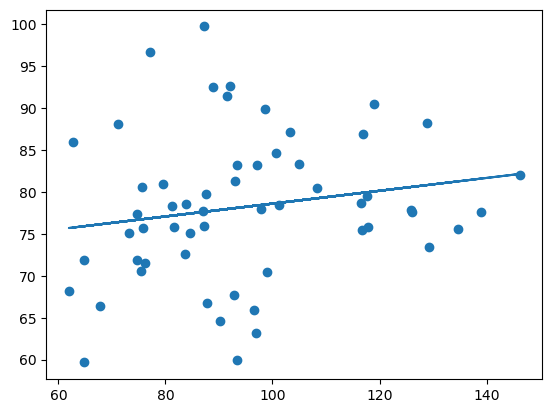

In [106]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, y)
plt.plot(X, mymodel)
plt.show()

In [107]:
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r**2}")
print(f"P-value: {p}")
print(f"Standard Error: {std_err}")

Slope: 0.07653520243041327
Intercept: 70.9475259869461
R-squared: 0.03188784015303669
P-value: 0.18383846297976655
Standard Error: 0.056863053314994666


In [108]:
nfl_mean.head()

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,avgPoints,Score,MVPs,OPOY,SB_MVP,SB_wins,SB_app,all_pro,pro_bowl,opoy_pts
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,9.807917,...,18.333333,78.854149,0,0,0,0,0,0,0,0
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,8.449808,...,15.923077,66.184733,0,0,0,0,0,0,0,0
2,Anthony Richardson,20.500000,2818.000000,63.050000,7.550000,22.500000,12.000000,11.000000,139.550000,7.045000,...,15.100000,58.975000,0,0,0,0,0,0,0,0
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,8.662500,...,17.600000,71.173929,0,0,0,0,0,0,0,0
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,7.492500,...,14.342857,56.901452,0,0,0,0,0,0,0,0


In [181]:
nfl_mean["mvpPoints"] = nfl_mean["MVPs"] * 80
#nfl_mean["OPOYPoints"] = nfl_mean["OPOY"] * 70
nfl_mean["SB_MVP_Points"] = nfl_mean["SB_MVP"] * 50
nfl_mean["SB_app_Points"] = nfl_mean["SB_app"] * 25
nfl_mean["all_pro_Points"] = nfl_mean["all_pro"] * 75
nfl_mean["pro_bowl_Points"] = nfl_mean["pro_bowl"] * 35


In [201]:
nfl_mean["NewScore"] = nfl_mean["ydPoints"] + nfl_mean["qbrPoints"] + nfl_mean["tdsPoints"] + nfl_mean["intPoints"] + nfl_mean["avgPoints"] + nfl_mean["mvpPoints"] + nfl_mean["SB_MVP_Points"] + nfl_mean["SB_app_Points"] + nfl_mean["all_pro_Points"] + nfl_mean["pro_bowl_Points"]

In [203]:
nfl_mean.head(15)

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,SB_app,all_pro,pro_bowl,opoy_pts,mvpPoints,SB_MVP_Points,SB_app_Points,all_pro_Points,pro_bowl_Points,NewScore
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,9.807917,...,0,0,0,0,0,0,0,0,0,78.854149
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,8.449808,...,0,0,0,0,0,0,0,0,0,66.184733
2,Anthony Richardson,20.500000,2818.000000,63.050000,7.550000,22.500000,12.000000,11.000000,139.550000,7.045000,...,0,0,0,0,0,0,0,0,0,58.975000
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,8.662500,...,0,0,0,0,0,0,0,0,0,71.173929
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,7.492500,...,0,0,0,0,0,0,0,0,0,56.901452
5,Blake Bortles,13.000000,3669.800000,62.940000,7.920000,26.000000,12.400000,31.200000,142.700000,9.174500,...,0,0,0,0,0,0,0,0,0,65.703855
6,Bo Nix,21.000000,3502.000000,64.800000,7.300000,25.000000,6.000000,19.000000,141.200000,8.755000,...,0,0,0,0,0,0,0,0,0,63.308333
7,Brandon Weeden,10.500000,3003.750000,63.250000,7.750000,19.500000,8.750000,24.750000,140.300000,7.509375,...,0,0,0,0,0,0,0,0,0,56.985089
8,Brock Osweiler,13.500000,3051.250000,58.325000,8.150000,22.750000,7.750000,23.000000,143.025000,7.628125,...,0,0,0,0,0,0,0,0,0,61.567722
9,Bryce Young,20.500000,3242.500000,66.350000,7.850000,25.000000,10.500000,24.500000,147.300000,8.106250,...,0,0,0,0,0,0,0,0,0,64.012440


In [199]:
nfl_mean.to_csv("final.csv", index=False)

In [219]:
names_to_keep_2 = [
    "Andrew Luck", "Andy Dalton", "Baker Mayfield", "Blaine Gabbert", "Blake Bortles", "Bo Nix", "Brandon Weeden",
    "Brock Osweiler", "Bryce Young", "C.J. Stroud", "Caleb Williams", "Cam Newton", "Christian Ponder",
    "Colin Kaepernick", "Daniel Jones", "Derek Carr", "Deshaun Watson", "DeShone Kizer", "Drake Maye", "Drew Lock",
    "Dwayne Haskins", "EJ Manuel", "Geno Smith", "Jake Locker", "Jalen Hurts", "Jameis Winston", "Jared Goff",
    "Jayden Daniels", "Jimmy Clausen", "Joe Burrow", "Johnny Manziel", "Jordan Love", "Josh Allen", "Josh Freeman",
    "Josh Rosen", "Justin Fields", "Justin Herbert", "Kenny Pickett", "Kyler Murray", "Lamar Jackson", "Mac Jones",
    "Marcus Mariota", "Mark Sanchez", "Matthew Stafford", "Mitchell Trubisky", "Patrick Mahomes", "Paxton Lynch",
    "Robert Griffin III", "Ryan Tannehill", "Sam Bradford", "Sam Darnold", "Teddy Bridgewater", "Tim Tebow",
    "Trevor Lawrence", "Tua Tagovailoa", "Will Levis", "Zach Wilson"
]

# Filter the DataFrame to keep only the rows where 'Name' is in the list
nfl_mean = nfl_mean[nfl_mean["Name"].isin(names_to_keep_2)]



In [223]:
nfl_mean.shape

(57, 29)

In [225]:
numbers = [0.57, 0.00, 0.43, 0.00, 0.25, 0.00, 0.00, 0.14, 0.00, 1.00, 
           0.00, 0.27, 0.00, 0.67, 0.00, 0.00, 0.14, 0.00, 0.00, 0.00, 
           0.00, 0.00, 0.00, 0.00, 0.80, 0.00, 0.56, 2.00, 0.00, 1.00, 
           0.00, 0.20, 0.86, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.43, 
           0.00, 0.10, 0.40, 0.25, 0.00, 1.50, 0.00, 0.00, 0.17, 0.00, 
           0.00, 0.00, 0.33, 0.25, 0.00, 0.00, 0.00]

# Add the list as a new column in the DataFrame
nfl_mean["playoff_wins_per_season"] = numbers

# Display the DataFrame
print(nfl_mean)

                  Name       Year        Yards        PCT       Avg  \
0          Andrew Luck  11.666667  3923.166667  65.533333  9.166667   
1          Andy Dalton  14.076923  3379.923077  64.923077  7.961538   
3       Baker Mayfield  18.000000  3465.000000  65.583333  8.800000   
4       Blaine Gabbert  11.571429  2997.000000  63.371429  7.171429   
5        Blake Bortles  13.000000  3669.800000  62.940000  7.920000   
6               Bo Nix  21.000000  3502.000000  64.800000  7.300000   
7       Brandon Weeden  10.500000  3003.750000  63.250000  7.750000   
8       Brock Osweiler  13.500000  3051.250000  58.325000  8.150000   
9          Bryce Young  20.500000  3242.500000  66.350000  7.850000   
10         C.J. Stroud  20.500000  3579.500000  64.800000  7.500000   
11      Caleb Williams  21.000000  3327.000000  66.500000  8.400000   
12          Cam Newton  13.000000  3351.363636  61.081818  8.118182   
14    Christian Ponder   9.000000  3150.333333  64.400000  8.100000   
15    

/var/folders/h5/g5mwjc1926zd0xzv2yw3wfpc0000gn/T/ipykernel_92799/280981709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_mean["playoff_wins_per_season"] = numbers


In [253]:
nfl_mean["playoff_win_Points"] = nfl_mean["playoff_wins_per_season"] * 100


In [255]:
nfl_mean.head()

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,pro_bowl,opoy_pts,mvpPoints,SB_MVP_Points,SB_app_Points,all_pro_Points,pro_bowl_Points,NewScore,playoff_wins_per_season,playoff_win_Points
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,9.807917,...,0,0,0,0,0,0,0,84.554149,0.57,57.0
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,8.449808,...,0,0,0,0,0,0,0,66.184733,0.00,0.0
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,8.662500,...,0,0,0,0,0,0,0,75.473929,0.43,43.0
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,7.492500,...,0,0,0,0,0,0,0,56.901452,0.00,0.0
5,Blake Bortles,13.000000,3669.800000,62.940000,7.920000,26.000000,12.400000,31.200000,142.700000,9.174500,...,0,0,0,0,0,0,0,68.203855,0.25,25.0


In [257]:
nfl_mean["NewScore"] = nfl_mean["ydPoints"] + nfl_mean["qbrPoints"] + nfl_mean["tdsPoints"] + nfl_mean["intPoints"] + nfl_mean["avgPoints"] + nfl_mean["mvpPoints"] + nfl_mean["SB_MVP_Points"] + nfl_mean["SB_app_Points"] + nfl_mean["all_pro_Points"] + nfl_mean["pro_bowl_Points"]+nfl_mean["playoff_win_Points"]

In [259]:
nfl_mean.head(47)

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,pro_bowl,opoy_pts,mvpPoints,SB_MVP_Points,SB_app_Points,all_pro_Points,pro_bowl_Points,NewScore,playoff_wins_per_season,playoff_win_Points
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,9.807917,...,0,0,0,0,0,0,0,135.854149,0.57,57.0
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,8.449808,...,0,0,0,0,0,0,0,66.184733,0.00,0.0
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,8.662500,...,0,0,0,0,0,0,0,114.173929,0.43,43.0
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,7.492500,...,0,0,0,0,0,0,0,56.901452,0.00,0.0
5,Blake Bortles,13.000000,3669.800000,62.940000,7.920000,26.000000,12.400000,31.200000,142.700000,9.174500,...,0,0,0,0,0,0,0,90.703855,0.25,25.0
6,Bo Nix,21.000000,3502.000000,64.800000,7.300000,25.000000,6.000000,19.000000,141.200000,8.755000,...,0,0,0,0,0,0,0,63.308333,0.00,0.0
7,Brandon Weeden,10.500000,3003.750000,63.250000,7.750000,19.500000,8.750000,24.750000,140.300000,7.509375,...,0,0,0,0,0,0,0,56.985089,0.00,0.0
8,Brock Osweiler,13.500000,3051.250000,58.325000,8.150000,22.750000,7.750000,23.000000,143.025000,7.628125,...,0,0,0,0,0,0,0,75.567722,0.14,14.0
9,Bryce Young,20.500000,3242.500000,66.350000,7.850000,25.000000,10.500000,24.500000,147.300000,8.106250,...,0,0,0,0,0,0,0,64.012440,0.00,0.0
10,C.J. Stroud,20.500000,3579.500000,64.800000,7.500000,25.000000,8.500000,32.500000,141.650000,8.948750,...,0,0,0,0,0,0,0,163.701985,1.00,100.0


In [261]:
nfl_mean.to_csv("nfl_final.csv", index=False)

In [239]:
names_to_keep_2 = [
    "Andrew Luck", "Andy Dalton", "Baker Mayfield", "Blaine Gabbert", "Blake Bortles", "Bo Nix", "Brandon Weeden",
    "Brock Osweiler", "Bryce Young", "C.J. Stroud", "Caleb Williams", "Cam Newton", "Christian Ponder",
    "Colin Kaepernick", "Daniel Jones", "Derek Carr", "Deshaun Watson", "DeShone Kizer", "Drake Maye", "Drew Lock",
    "Dwayne Haskins", "EJ Manuel", "Geno Smith", "Jake Locker", "Jalen Hurts", "Jameis Winston", "Jared Goff",
    "Jayden Daniels", "Jimmy Clausen", "Joe Burrow", "Johnny Manziel", "Jordan Love", "Josh Allen", "Josh Freeman",
    "Josh Rosen", "Justin Fields", "Justin Herbert", "Kenny Pickett", "Kyler Murray", "Lamar Jackson", "Mac Jones",
    "Marcus Mariota", "Mark Sanchez", "Matthew Stafford", "Mitchell Trubisky", "Patrick Mahomes", "Paxton Lynch",
    "Robert Griffin III", "Ryan Tannehill", "Sam Bradford", "Sam Darnold", "Teddy Bridgewater", "Tim Tebow",
    "Trevor Lawrence", "Tua Tagovailoa", "Will Levis", "Zach Wilson"
]

# Filter the DataFrame to keep only the rows where 'Name' is in the list
cf_filtered = cf_filtered[cf_filtered["Name"].isin(names_to_keep_2)]

In [241]:
cf_filtered.shape

(110, 15)

In [245]:
college = pd.read_csv("college_scores.csv")

In [247]:
names_to_keep_2 = [
    "Andrew Luck", "Andy Dalton", "Baker Mayfield", "Blaine Gabbert", "Blake Bortles", "Bo Nix", "Brandon Weeden",
    "Brock Osweiler", "Bryce Young", "C.J. Stroud", "Caleb Williams", "Cam Newton", "Christian Ponder",
    "Colin Kaepernick", "Daniel Jones", "Derek Carr", "Deshaun Watson", "DeShone Kizer", "Drake Maye", "Drew Lock",
    "Dwayne Haskins", "EJ Manuel", "Geno Smith", "Jake Locker", "Jalen Hurts", "Jameis Winston", "Jared Goff",
    "Jayden Daniels", "Jimmy Clausen", "Joe Burrow", "Johnny Manziel", "Jordan Love", "Josh Allen", "Josh Freeman",
    "Josh Rosen", "Justin Fields", "Justin Herbert", "Kenny Pickett", "Kyler Murray", "Lamar Jackson", "Mac Jones",
    "Marcus Mariota", "Mark Sanchez", "Matthew Stafford", "Mitchell Trubisky", "Patrick Mahomes", "Paxton Lynch",
    "Robert Griffin III", "Ryan Tannehill", "Sam Bradford", "Sam Darnold", "Teddy Bridgewater", "Tim Tebow",
    "Trevor Lawrence", "Tua Tagovailoa", "Will Levis", "Zach Wilson"
]

# Filter the DataFrame to keep only the rows where 'Name' is in the list
college = college[college["Name"].isin(names_to_keep_2)]

In [249]:
college.shape

(57, 15)

In [251]:
college.to_csv("college_final.csv", index=False)

In [263]:
nfl_new = nfl_mean.copy()


In [265]:
nfl_new.shape

(57, 31)

In [267]:
nfl_new.columns

Index(['Name', 'Year', 'Yards', 'PCT', 'Avg', 'TDs', 'INT', 'Sacks', 'Rating',
       'ydPoints', 'qbrPoints', 'tdsPoints', 'intPoints', 'avgPoints', 'Score',
       'MVPs', 'OPOY', 'SB_MVP', 'SB_wins', 'SB_app', 'all_pro', 'pro_bowl',
       'opoy_pts', 'mvpPoints', 'SB_MVP_Points', 'SB_app_Points',
       'all_pro_Points', 'pro_bowl_Points', 'NewScore',
       'playoff_wins_per_season', 'playoff_win_Points'],
      dtype='object')

In [269]:
nfl_new["ydPoints"] = nfl_new["Yards"] / 200
nfl_new["qbrPoints"] = nfl_new["Rating"] / 5
nfl_new["tdsPoints"] = nfl_new["TDs"] * 2
nfl_new["intPoints"] = (nfl_new["TDs"] / nfl_new["INT"]) / 5
#cf_filtered["sackPoints"] = cf_filtered["Sacks"] / 10
nfl_new["avgPoints"] = nfl_new["Avg"] * 2
nfl_new["mvpPoints"] = nfl_new["MVPs"] * 40
#nfl_mean["OPOYPoints"] = nfl_mean["OPOY"] * 70
nfl_new["SB_MVP_Points"] = nfl_new["SB_MVP"] * 35
nfl_new["SB_app_Points"] = nfl_new["SB_app"] * 25
nfl_new["all_pro_Points"] = nfl_new["all_pro"] * 35
nfl_new["pro_bowl_Points"] = nfl_new["pro_bowl"] * 15
nfl_new["opoy_pts"] = nfl_new["OPOY"] * 35
# add playoff wins in final score

In [271]:
nfl_new["Final_score"] = nfl_new["ydPoints"] + nfl_new["qbrPoints"] + nfl_new["tdsPoints"] + nfl_new["intPoints"] + nfl_new["avgPoints"] + nfl_new["mvpPoints"] + nfl_new["SB_MVP_Points"] + nfl_new["SB_app_Points"] + nfl_new["all_pro_Points"] + nfl_new["pro_bowl_Points"]+nfl_new["playoff_win_Points"] + nfl_new["opoy_pts"]


In [273]:
nfl_new.head()

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,opoy_pts,mvpPoints,SB_MVP_Points,SB_app_Points,all_pro_Points,pro_bowl_Points,NewScore,playoff_wins_per_season,playoff_win_Points,Final_score
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,19.615833,...,0,0,0,0,0,0,135.854149,0.57,57.0,195.505399
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,16.899615,...,0,0,0,0,0,0,66.184733,0.00,0.0,115.931464
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,17.325000,...,0,0,0,0,0,0,114.173929,0.43,43.0,166.943095
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,14.985000,...,0,0,0,0,0,0,56.901452,0.00,0.0,99.065381
5,Blake Bortles,13.000000,3669.800000,62.940000,7.920000,26.000000,12.400000,31.200000,142.700000,18.349000,...,0,0,0,0,0,0,90.703855,0.25,25.0,140.148355


In [275]:
nfl_new.to_csv("nfl_new.csv", index=False)


In [279]:
coll_new = cf_filtered.copy()

In [295]:
college["qbrPoints"] = college["Rating"] / 5
college["tdsPoints"] = college["TDs"] * 2
college["intPoints"] = (college["TDs"] / college["INT"]) / 5
#cf_filtered["sackPoints"] = cf_filtered["Sacks"] / 10
college["avgPoints"] = college["Avg"] * 2
college["ydPoints"] = college["Yards"] / 200

In [297]:
college["Score"] = college["ydPoints"] + college["qbrPoints"] + college["tdsPoints"] +college["intPoints"] + college["avgPoints"]


In [299]:
college.head()

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,qbrPoints,tdsPoints,intPoints,avgPoints,Score
0,Andrew Luck,7.0,3143.333333,66.100000,8.866667,27.333333,7.333333,7.666667,161.133333,15.716667,32.226667,54.666667,0.745455,17.733333,121.088788
1,Andy Dalton,6.5,2806.500000,63.850000,8.750000,25.000000,7.000000,10.000000,159.150000,14.032500,31.830000,50.000000,0.714286,17.500000,114.076786
2,Baker Mayfield,13.0,4097.333333,69.833333,10.666667,39.666667,7.000000,27.666667,189.533333,20.486667,37.906667,79.333333,1.133333,21.333333,160.193333
3,Blaine Gabbert,6.5,3389.500000,61.150000,7.400000,20.000000,9.000000,21.000000,133.750000,16.947500,26.750000,40.000000,0.444444,14.800000,98.941944
4,Blake Bortles,9.5,3320.000000,65.350000,8.550000,25.000000,8.000000,21.500000,153.950000,16.600000,30.790000,50.000000,0.625000,17.100000,115.115000


In [301]:
college.shape

(57, 15)

In [303]:
college.to_csv("coll_new.csv", index=False)

In [311]:
nfl_new.head(57)

,Name,Year,Yards,PCT,Avg,TDs,INT,Sacks,Rating,ydPoints,...,opoy_pts,mvpPoints,SB_MVP_Points,SB_app_Points,all_pro_Points,pro_bowl_Points,NewScore,playoff_wins_per_season,playoff_win_Points,Final_score
0,Andrew Luck,11.666667,3923.166667,65.533333,9.166667,33.333333,7.666667,21.500000,165.100000,19.615833,...,0,0,0,0,0,0,135.854149,0.57,57.0,195.505399
1,Andy Dalton,14.076923,3379.923077,64.923077,7.961538,26.538462,10.307692,21.153846,147.584615,16.899615,...,0,0,0,0,0,0,66.184733,0.00,0.0,115.931464
3,Baker Mayfield,18.000000,3465.000000,65.583333,8.800000,28.166667,7.000000,22.333333,159.400000,17.325000,...,0,0,0,0,0,0,114.173929,0.43,43.0,166.943095
4,Blaine Gabbert,11.571429,2997.000000,63.371429,7.171429,21.142857,10.714286,19.571429,135.285714,14.985000,...,0,0,0,0,0,0,56.901452,0.00,0.0,99.065381
5,Blake Bortles,13.000000,3669.800000,62.940000,7.920000,26.000000,12.400000,31.200000,142.700000,18.349000,...,0,0,0,0,0,0,90.703855,0.25,25.0,140.148355
6,Bo Nix,21.000000,3502.000000,64.800000,7.300000,25.000000,6.000000,19.000000,141.200000,17.510000,...,0,0,0,0,0,0,63.308333,0.00,0.0,111.183333
7,Brandon Weeden,10.500000,3003.750000,63.250000,7.750000,19.500000,8.750000,24.750000,140.300000,15.018750,...,0,0,0,0,0,0,56.985089,0.00,0.0,98.024464
8,Brock Osweiler,13.500000,3051.250000,58.325000,8.150000,22.750000,7.750000,23.000000,143.025000,15.256250,...,0,0,0,0,0,0,75.567722,0.14,14.0,120.248347
9,Bryce Young,20.500000,3242.500000,66.350000,7.850000,25.000000,10.500000,24.500000,147.300000,16.212500,...,0,0,0,0,0,0,64.012440,0.00,0.0,111.848690
10,C.J. Stroud,20.500000,3579.500000,64.800000,7.500000,25.000000,8.500000,32.500000,141.650000,17.897500,...,0,0,0,0,0,0,163.701985,1.00,100.0,211.815735
